In [3]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import random

%matplotlib inline

In [4]:
# Always reset the pseudo random number generator to the same number.
seed = 2
np.random.seed(seed)
random.seed(seed)

In [5]:
# Define the number of examples.
N = 1000

# Features.
x1 = np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# Noise.
w = np.random.randn(N, 1)

# Generate target function.
y = x1 + x2 

# Observable function.
y_noisy = y + w

In [6]:
# Generate values for parameters.
M = 200
a1 = np.linspace(-12.0, 14.0, M)
a2 = np.linspace(-12.0, 14.0, M)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1.0/N)*np.sum(np.square(y_noisy - yhat))

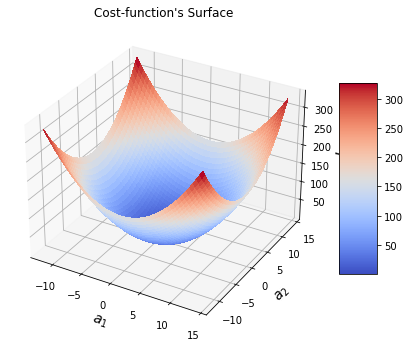

In [7]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
#plt.savefig("error_surface_sgd_ls.png", dpi=600)
#Show the plot.
plt.show()

In [8]:
# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

yhat = X.dot(a_opt)
Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

In [9]:
# learning schedule: Temporal decay.
def timeBasedDecay(alpha_int, k, t):
    return alpha_int / (1.0 + k*t)

# learning schedule: Exponential decay.
def exponentialDecay(alpha_int, k, t):
    return alpha_int * np.exp(-k*t)

# learning schedule: Gradual decay.
def stepDecay(alpha_int, t, epochs_drop=8.0):
    drop = 0.5
    alpha = alpha_int * math.pow(drop, math.floor((1+t)/epochs_drop))
    return alpha

def learning_schedule(typels, alpha_int, k, t):
    if(typels=='exp'):
        alpha = exponentialDecay(alpha_int, k, t)
    elif(typels=='time'):
        alpha = timeBasedDecay(alpha_int, k, t)
    elif(typels=='step'):
        alpha = stepDecay(alpha_int, t)
    else:
        alpha = alpha_int
    return alpha

In [10]:
# Number of epochs.
n_epochs = 1

# Constant learning rate.
alpha_int = 0.1

# Decay rate.
#k = 0.1 #(exp)
k = 0.01

In [11]:
# Random initialization of parameters.
a = np.array([-10.0, -10.0]).reshape(2, 1)

# Create vector for parameter history.
a_hist = np.zeros((2, n_epochs*N+1))
# Initialize history vector.
a_hist[:, 0] = a.reshape(2,)

# Create vector to store eta history.
alpha_hist = np.zeros((n_epochs*N))

update_prev = np.zeros((2, 1))

# Create array for storing error values.
Jgd = np.zeros(n_epochs*N+1)

Jgd[0] = (1.0/N)*sum(np.power(y_noisy - X.dot(a), 2))

update_hist = np.zeros((2, n_epochs*N))

gradient_hist = np.zeros((2, n_epochs*N))

# Stocastic gradient-descent loop.
for epoch in range(n_epochs):
    
    # Shuffle the whole dataset before every epoch.
    shuffled_data_set_indexes = random.sample(range(0, N), N)    

    for i in range(N):
        random_index = shuffled_data_set_indexes[i]
        xi = X[random_index:random_index+1]
        yi = y_noisy[random_index:random_index+1]
        
        alpha = learning_schedule('step', alpha_int, k, epoch*N + i)
        
        gradient = -2.0*xi.T.dot(yi - xi.dot(a))
        update = alpha*gradient
        a = a - update
        
        a_hist[:, epoch*N+i+1] = a.reshape(2,)
        alpha_hist[epoch*N+i] = alpha
        update_hist[:, epoch*N+i] = update.reshape(2,)
        gradient_hist[:, epoch*N+i] = gradient.reshape(2,)
        
        Jgd[epoch*N+i+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))

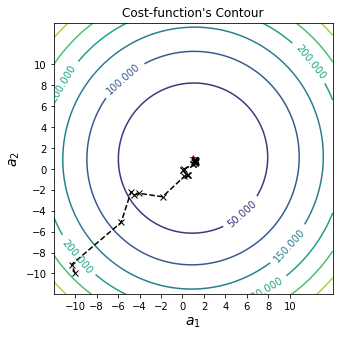

In [12]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx--')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.savefig("error_contour_sgd_ls.png", dpi=600)
plt.show()

In [13]:
# Print found values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_sgd: ' + str(a[0, 0]))
print('a2_sgd: ' + str(a[1, 0]))

a1_opt: 0.98225721822437
a2_opt: 1.038742104110112
a1_sgd: 1.1339333174411281
a2_sgd: 0.8229800783478779


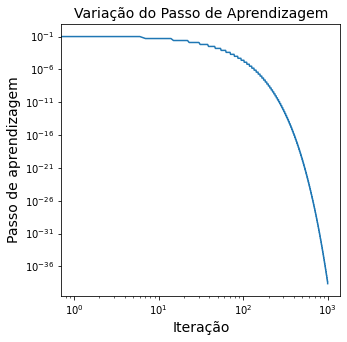

In [14]:
# Plot alpha history     
fig = plt.figure(figsize=(5,5))
plt.plot(range(0,n_epochs*N), alpha_hist)
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Iteração', fontsize=14)
plt.ylabel('Passo de aprendizagem', fontsize=14)
plt.title('Variação do Passo de Aprendizagem', fontsize=14)
plt.savefig("passo_de_aprendizagem_gradual.png", dpi=600)
plt.show()

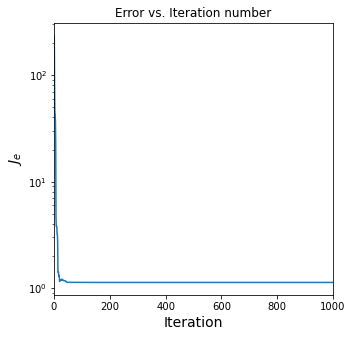

In [15]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, n_epochs*N), Jgd[0:n_epochs*N])
plt.xlim((0, n_epochs*N))
plt.yscale('log')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Iteration number')
#plt.savefig("error_vs_iteration_sgd_ls.png", dpi=600)
plt.show()

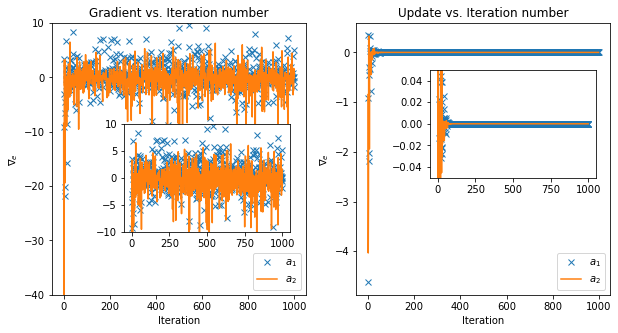

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(np.arange(0, n_epochs*N), gradient_hist[0,:], 'x', label='$a_1$')
ax1.plot(np.arange(0, n_epochs*N), gradient_hist[1,:], label='$a_2$')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('$\\nabla_e$')
ax1.set_title('Gradient vs. Iteration number')
ax1.set_ylim(-40,10)
ax1.legend()

ax2.plot(np.arange(0, n_epochs*N), update_hist[0,:], 'x', label='$a_1$')
ax2.plot(np.arange(0, n_epochs*N), update_hist[1,:], label='$a_2$')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$\\nabla_e$')
ax2.set_title('Update vs. Iteration number')
ax2.legend()

left, bottom, width, height = [0.225, 0.3, 0.23, 0.3]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(np.arange(0, n_epochs*N), gradient_hist[0,:], 'x')
ax3.plot(np.arange(0, n_epochs*N), gradient_hist[1,:])
#ax3.set_xlim(0.2, 0.8)
ax3.set_ylim(-10,10)

left, bottom, width, height = [0.65, 0.45, 0.23, 0.3]
ax4 = fig.add_axes([left, bottom, width, height])
ax4.plot(np.arange(0, n_epochs*N), update_hist[0,:], 'x')
ax4.plot(np.arange(0, n_epochs*N), update_hist[1,:])
#ax4.set_xlim(0.2, 0.8)
ax4.set_ylim(-0.05, 0.05)

plt.show()

### Variância do histórico de gradientes

In [19]:
var1 = np.var(gradient_hist[0,:])
var2 = np.var(gradient_hist[1,:])

print('var a1:',var1)
print('var a2:',var2)

var a1: 7.93568639827192
var a2: 7.834609762011271
